In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

# Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Splitting and Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


# Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.shape

(3150, 5)

# Data Cleaning and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,rating,feedback
count,3149.000000,3149.000000
mean,4.463957,0.918704
std,1.067773,0.273332
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [9]:
df['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

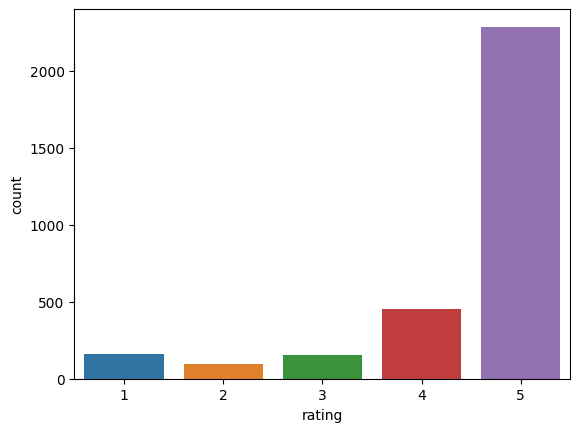

In [10]:
#Now let's see some visuals
sns.countplot(x=df['rating'])
plt.show()

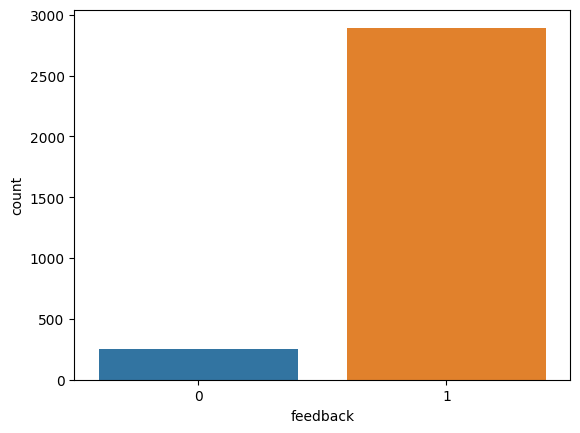

In [11]:
sns.countplot(x=df['feedback'])
plt.show()

# Text Preprocessing

In [12]:
#Creating a function to preprocess text

def preprocess_text(text):
    #Punctuation removal
    words = text.lower().split()
    words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    #Stopword removal
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    
    #Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    #Joining the text
    clean_text = ' '.join(words)
    return clean_text
    

In [13]:
df['text'] = df['verified_reviews'].apply(preprocess_text)

# Word Cloud

In [14]:
all_words = ' '.join(word for word in df['text'])

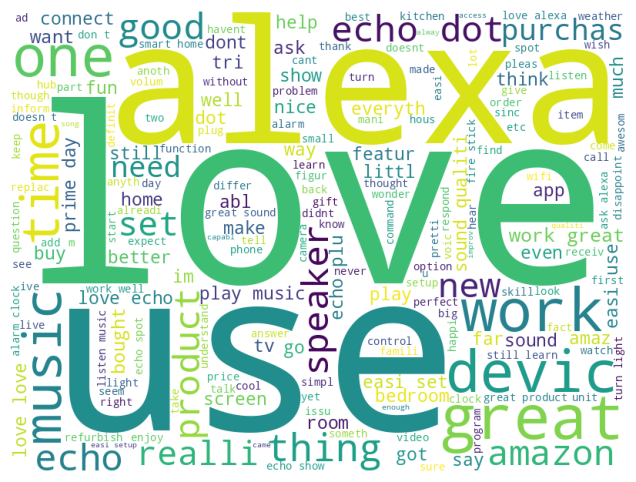

In [15]:
wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(all_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Model Building

In [16]:
#Let's convert the text into numbers vector first.
vec = TfidfVectorizer()
X = vec.fit_transform(df['text']).toarray()

In [17]:
y = df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
lr_pred = lr.predict(X_test)
print('Classification Report for Logistic Regression: \n', classification_report(y_test, lr_pred))

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.90      1.00      0.95       567

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.81      0.90      0.85       630



**Multinomial NB**

In [20]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [21]:
nb_pred = nb.predict(X_test)
print('Classification Report for Multinomial NB: \n', classification_report(y_test, nb_pred))

Classification Report for Multinomial NB: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.90      1.00      0.95       567

    accuracy                           0.90       630
   macro avg       0.45      0.50      0.47       630
weighted avg       0.81      0.90      0.85       630



# Thankyou for exploring this notebook!!